In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df =pd.read_csv("/content/drive/MyDrive/Wine_Quality_Data.csv")

In [ ]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [ ]:
df['color'].unique()

array(['red', 'white'], dtype=object)

In [ ]:
y = df['color']
X = df.drop(columns=['color'])

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()
y = lb.fit_transform(y)


In [ ]:
y = y.ravel()

In [ ]:
y = pd.Series(y)

In [ ]:
X.corrwith(y).abs().sort_values()

alcohol                 0.032970
quality                 0.119323
citric_acid             0.187397
pH                      0.329129
residual_sugar          0.348821
density                 0.390645
free_sulfur_dioxide     0.471644
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
total_sulfur_dioxide    0.700357
dtype: float64

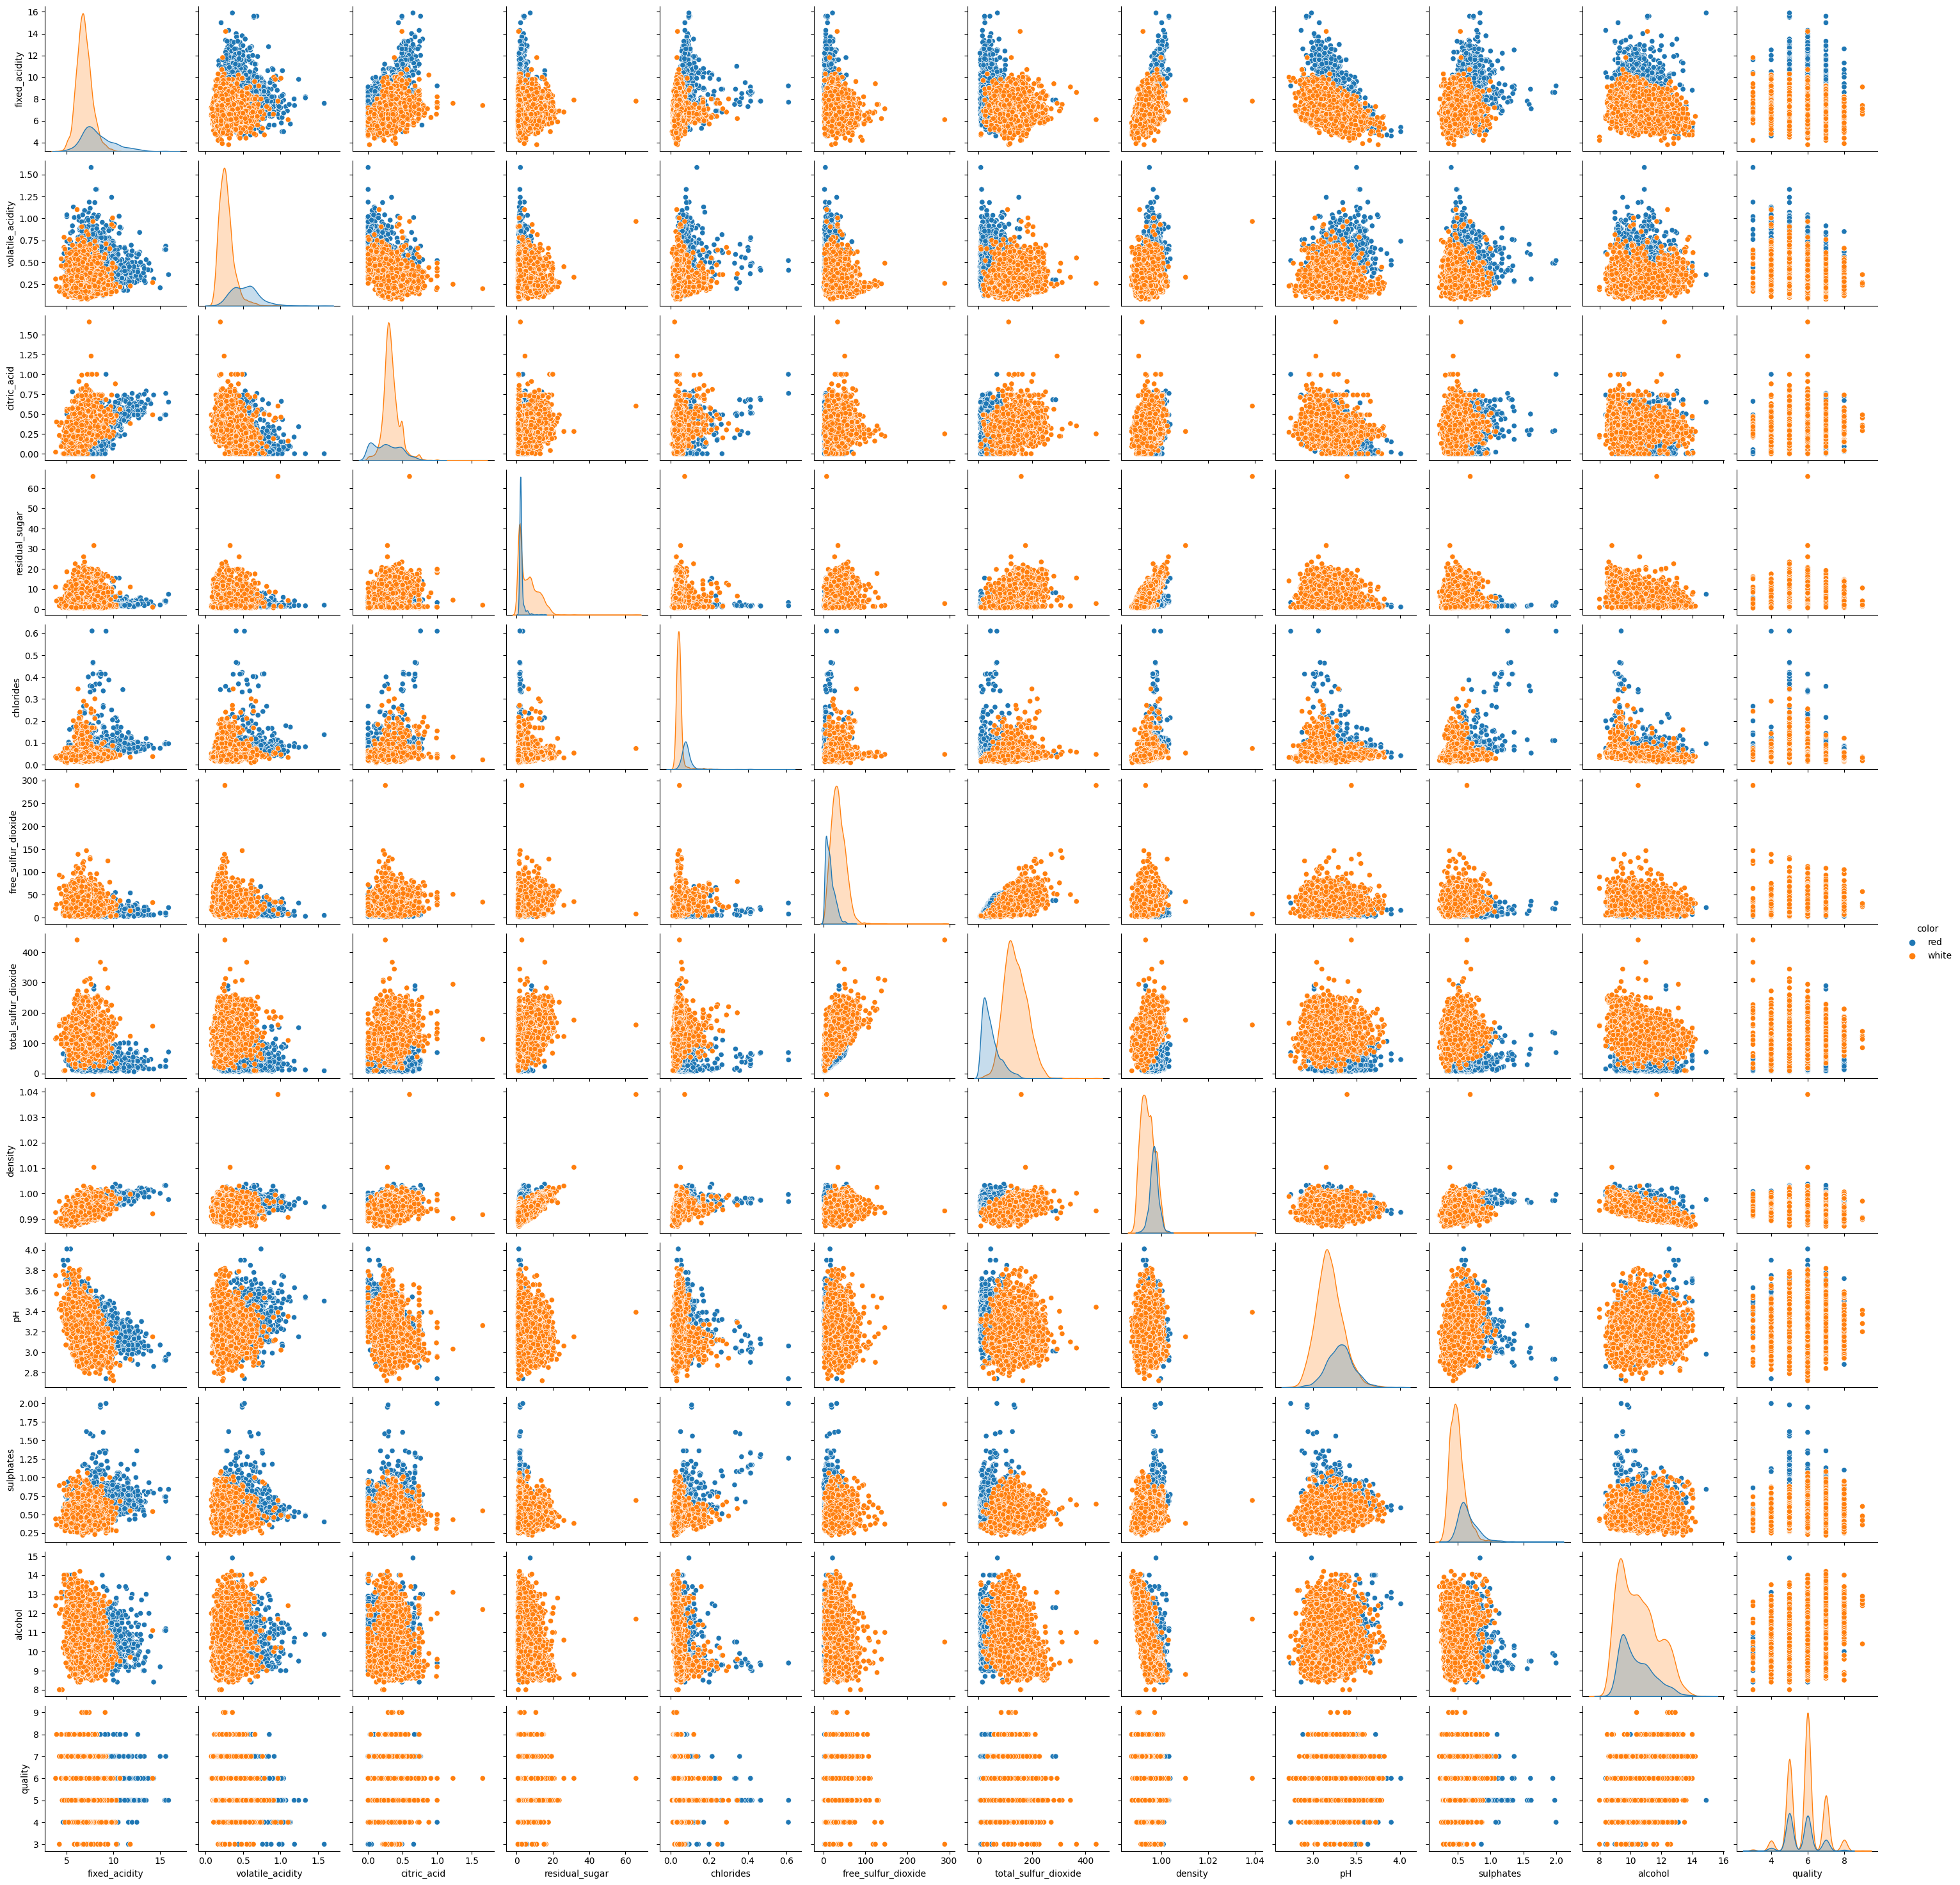

In [ ]:
sb.pairplot(df,hue ='color')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape , type(X_scaled)

((6497, 12), numpy.ndarray)

In [ ]:
fields = X.columns

In [ ]:
X = pd.DataFrame(X_scaled , columns= ['%s_scaled' % fld for fld in fields])

In [ ]:
from sklearn.model_selection import  StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=200 , random_state=22)

In [ ]:
train,test = next(sss.split(X,y))

In [ ]:
X_train = X.iloc[train]
y_train = y.iloc[train]
X_test = X.iloc[test]
y_test = y.iloc[test]

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc = svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
# cross validation splits
skfold = StratifiedKFold(n_splits=3)
estimator = Pipeline([('svc' ,SVC() )])
grid = {'svc__C':[1,2,3] ,'svc__degree':[2,3] ,'svc__gamma':[1,2,3,4,5,6,7,8]}
g = GridSearchCV(estimator , grid ,scoring='f1_weighted' , cv = skfold)

In [ ]:
g.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('svc', SVC())]),
             param_grid={'svc__C': [1, 2, 3], 'svc__degree': [2, 3],
                         'svc__gamma': [1, 2, 3, 4, 5, 6, 7, 8]},
             scoring='f1_weighted')

In [ ]:
g.best_estimator_

Pipeline(steps=[('svc', SVC(C=3, degree=2, gamma=6))])

In [ ]:
y_pred2 = g.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.99      0.99      0.99       151

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [ ]:
print(classification_report(y_test ,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.99      1.00      1.00       151

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



## Nystrome approximation

Approximates the kernel transformation to be more computaionnaly efficient with a slight drop in perfromance

In [ ]:
# nystroem approximation
from sklearn.kernel_approximation import Nystroem
n = Nystroem(kernel='rbf', gamma=3, degree=3, n_components=100, random_state=22)  # as no of componenets increase, model complexity increase
X_train_transformed = n.fit_transform(X_train)

In [ ]:
X_test_transformed = n.fit_transform(X_test)

In [ ]:
X_transformed.shape , y_train.shape

((6297, 100), (6297,))

In [ ]:
# use SGDclassifier
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier (loss ='hinge')   # loss hinge means linear SVC
classifier.fit(X_train_transformed , y_train ) # tune learning parameter

SGDClassifier()

In [ ]:

y_pred3 = classifier.predict(X_test_transformed)

In [ ]:
print(classification_report(y_test ,y_pred3))

NameError: ignored

Classificaion metrics are very bad for the approximated model.

Use cross validation to tune hyper paramet